In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv('D:\Coding_Dev\College\SEM_6\machine-learning-niit\Assets\water_potability.csv')
data.dropna(inplace=True)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [30]:
svm_hard = NuSVC(kernel='linear')
svm_hard.fit(X_train, y_train)
y_pred_hard = svm_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f'Accuracy (Hard Margin NuSVC, Linear Kernel): {accuracy_hard:.2f}')

Accuracy (Hard Margin NuSVC, Linear Kernel): 0.52


In [31]:
penalty_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55]

In [32]:
accuracies_linear_soft = []
for nu in penalty_values:
    svm_linear_soft = NuSVC(kernel='linear', nu=nu)
    svm_linear_soft.fit(X_train, y_train)
    y_pred_linear_soft = svm_linear_soft.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_linear_soft)
    accuracies_linear_soft.append(accuracy)
    print(f'Accuracy (Linear Soft NuSVC, nu={nu}): {accuracy:.2f}')

Accuracy (Linear Soft NuSVC, nu=0.01): 0.56
Accuracy (Linear Soft NuSVC, nu=0.1): 0.47
Accuracy (Linear Soft NuSVC, nu=0.2): 0.46
Accuracy (Linear Soft NuSVC, nu=0.3): 0.56
Accuracy (Linear Soft NuSVC, nu=0.4): 0.60
Accuracy (Linear Soft NuSVC, nu=0.5): 0.52
Accuracy (Linear Soft NuSVC, nu=0.55): 0.62


In [33]:
best_linear_penalty = penalty_values[np.argmax(accuracies_linear_soft)]
polynomial_degrees = [2, 3, 4]
accuracies_poly_soft = []

for degree in polynomial_degrees:
    svm_poly_soft = NuSVC(kernel='poly', nu=best_linear_penalty, degree=degree)
    svm_poly_soft.fit(X_train, y_train)
    y_pred_poly_soft = svm_poly_soft.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_poly_soft)
    accuracies_poly_soft.append(accuracy)
    print(f'Accuracy (Poly Soft NuSVC, nu={best_linear_penalty}, Degree={degree}): {accuracy:.2f}')

Accuracy (Poly Soft NuSVC, nu=0.55, Degree=2): 0.46
Accuracy (Poly Soft NuSVC, nu=0.55, Degree=3): 0.57
Accuracy (Poly Soft NuSVC, nu=0.55, Degree=4): 0.55


In [34]:
sigma_values = [0.1, 1, 10]
accuracies_rbf_soft = []

for sigma in sigma_values:
    svm_rbf_soft = NuSVC(kernel='rbf', nu=best_linear_penalty, gamma=1 / (2 * sigma**2))
    svm_rbf_soft.fit(X_train, y_train)
    y_pred_rbf_soft = svm_rbf_soft.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rbf_soft)
    accuracies_rbf_soft.append(accuracy)
    print(f'Accuracy (RBF Soft NuSVC, nu={best_linear_penalty}, Sigma={sigma}): {accuracy:.2f}')

Accuracy (RBF Soft NuSVC, nu=0.55, Sigma=0.1): 0.49
Accuracy (RBF Soft NuSVC, nu=0.55, Sigma=1): 0.46
Accuracy (RBF Soft NuSVC, nu=0.55, Sigma=10): 0.45


In [35]:
def plot_decision_boundary(model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)

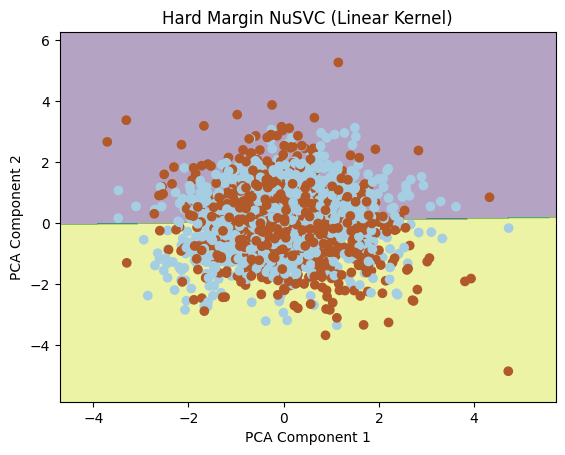

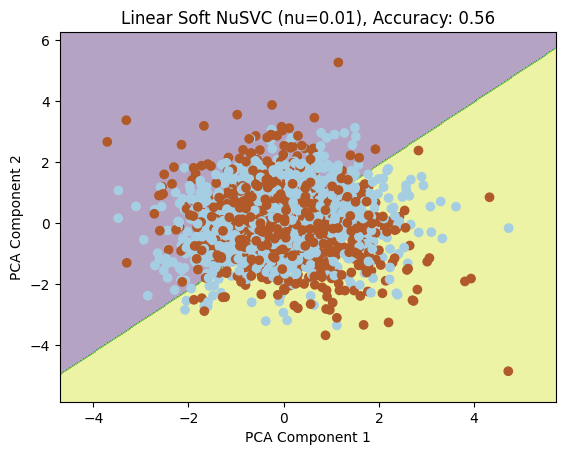

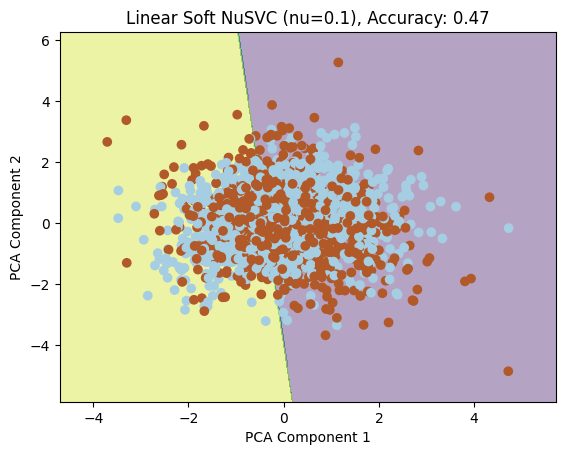

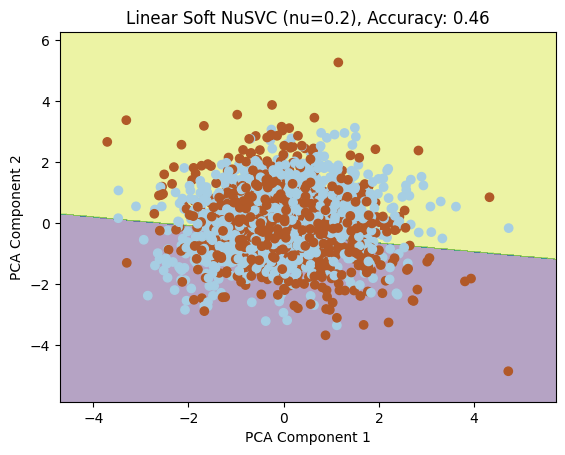

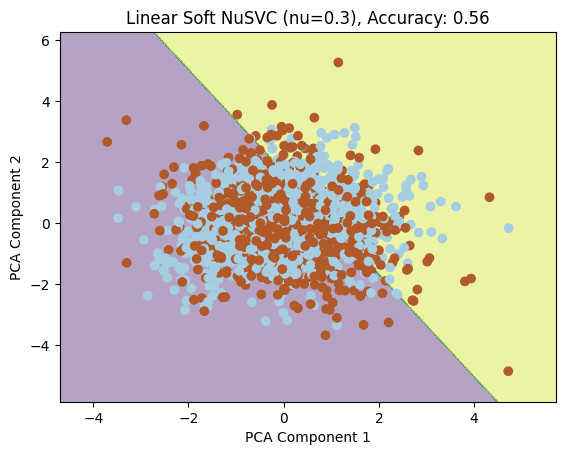

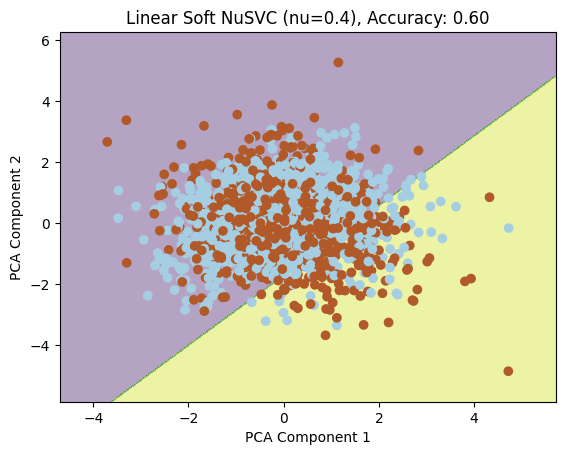

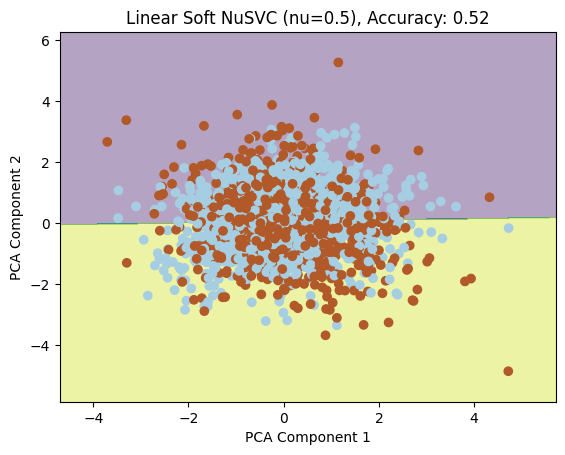

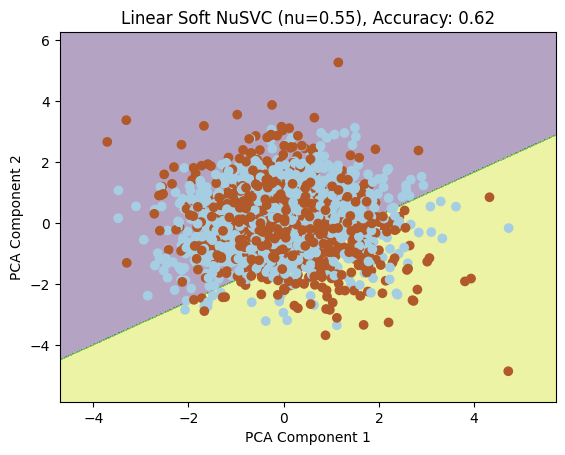

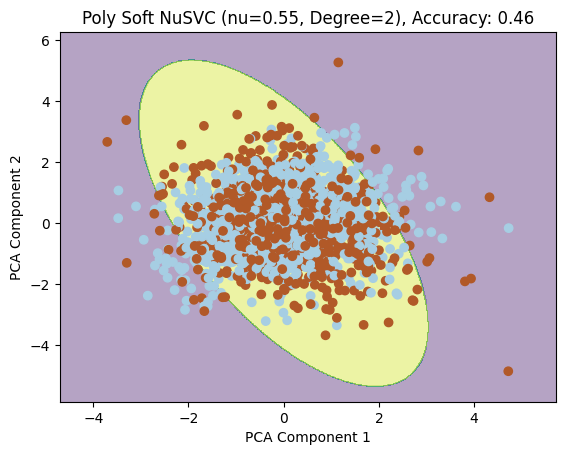

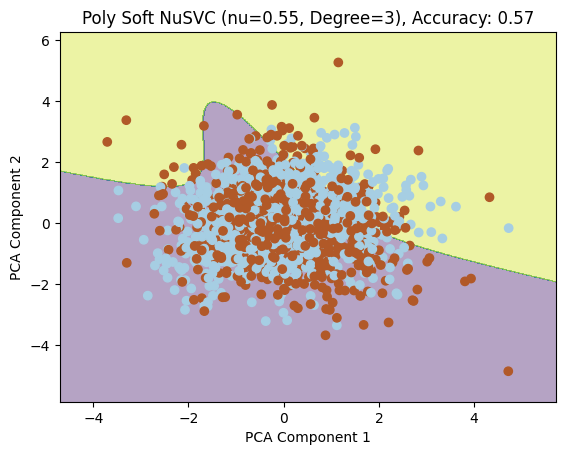

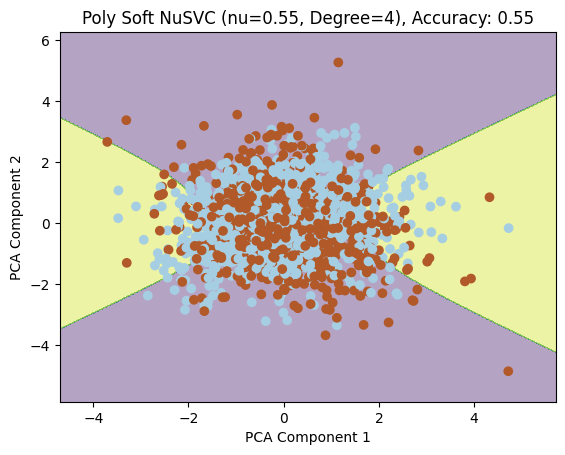

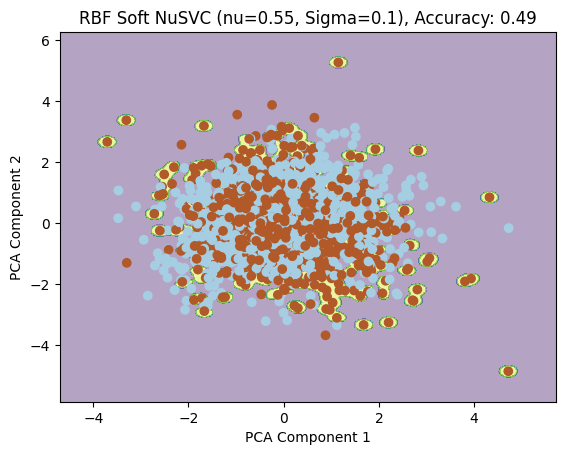

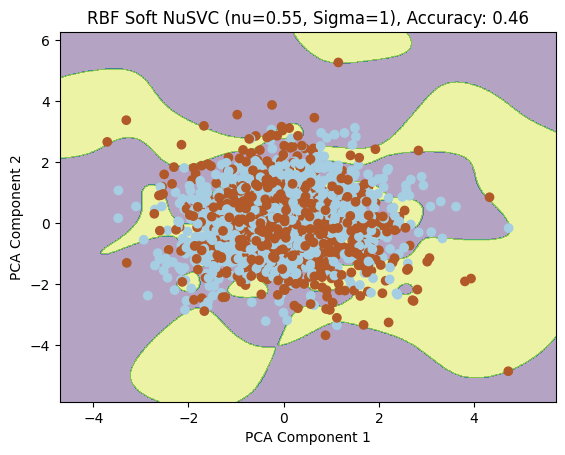

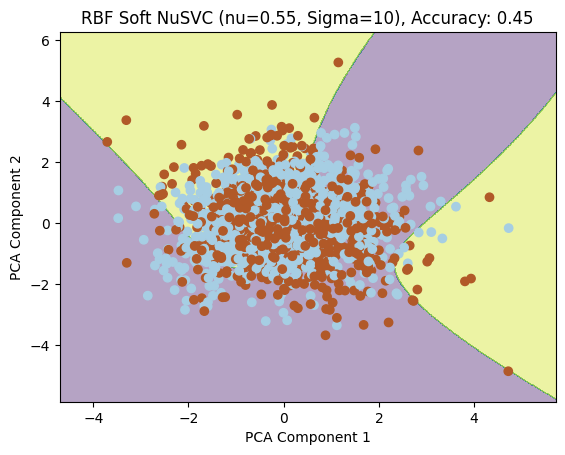

In [36]:
plot_decision_boundary(svm_hard, 'Hard Margin NuSVC (Linear Kernel)')
plt.show()

for nu, accuracy in zip(penalty_values, accuracies_linear_soft):
    title = f'Linear Soft NuSVC (nu={nu}), Accuracy: {accuracy:.2f}'
    svm_model = NuSVC(kernel='linear', nu=nu)
    svm_model.fit(X_train, y_train)
    plot_decision_boundary(svm_model, title)
    plt.show()

for degree, accuracy in zip(polynomial_degrees, accuracies_poly_soft):
    title = f'Poly Soft NuSVC (nu={best_linear_penalty}, Degree={degree}), Accuracy: {accuracy:.2f}'
    svm_model = NuSVC(kernel='poly', nu=best_linear_penalty, degree=degree)
    svm_model.fit(X_train, y_train)
    plot_decision_boundary(svm_model, title)
    plt.show()

for sigma, accuracy in zip(sigma_values, accuracies_rbf_soft):
    title = f'RBF Soft NuSVC (nu={best_linear_penalty}, Sigma={sigma}), Accuracy: {accuracy:.2f}'
    svm_model = NuSVC(kernel='rbf', nu=best_linear_penalty, gamma=1 / (2 * sigma**2))
    svm_model.fit(X_train, y_train)
    plot_decision_boundary(svm_model, title)
    plt.show()